In [127]:
import pandas as pd

In [128]:
ls

lost+found/  tunbert/  Untitled.ipynb  workbench.ipynb


In [129]:
ls tunbert/

bert_finetuning_SA_DC.log  environment_tf2.yml                README.md
core                       environment_torch.yml              TunBERT.png
DarijaBERT-arabizi/        LICENSE                            Untitled1.ipynb
dataset/                   models/                            Untitled.ipynb
dev-data/                  PretrainingBERTFromText--end.ckpt


In [130]:
ls tunbert/dataset/

cached_test.tsv_BertTokenizer_128_30522_-1_0_False.pkl   test.tsv
cached_train.tsv_BertTokenizer_128_30522_-1_0_True.pkl   train.tsv
cached_valid.tsv_BertTokenizer_128_30522_-1_0_False.pkl  valid.tsv


In [131]:
data="tunbert/dataset/train.tsv"

In [132]:
df=pd.read_csv(data, sep="\t",header=None)

In [133]:
df

,0,1
0,nchallah rabi m3ana bravo big boss,1
1,aweel cmnyr bravooo sanfouuur,1
2,walid inti mkache5 w win nemchi il paga min pa...,0
3,bllhh sayebna rahou joumhour lclub maye3taref ...,0
4,5amamt ta3mil pron,0
...,...,...
54022,nchlah mabrouk a3lina yal capo slouma,1
54023,toooop klay izzziiiin,1
54024,rabi i5lik iltouns wtwansa l9lalla,1
54025,inhebou nkharjoo kbayriat ca rabbbbi maak m sl...,1


In [134]:
for i in df[0].head():
    print(i, type(i))

nchallah rabi m3ana bravo big boss <class 'str'>
aweel cmnyr bravooo sanfouuur <class 'str'>
walid inti mkache5 w win nemchi il paga min paget il 4aliya nel9ak chnow dhahrek yekel fik baba 3la wé7id clubisti 7or <class 'str'>
bllhh sayebna rahou joumhour lclub maye3taref bchayy d tekel b3a4ha imoutou 2 3202 2000000000 nrml elmohem 3ana eljam3iya 5ater a4eka bech netnafsou a7na w kenk bch t5aleha bina bara 2telhe2 bsiyesa w a5tana <class 'str'>
5amamt ta3mil pron <class 'str'>


In [135]:
from tqdm import tqdm

In [136]:
words_list=[]
counter=tqdm(total=54027)

 13%|█▎        | 7057/54027 [00:18<02:03, 379.32it/s]


In [137]:
for i in df[0]:
    words=i.split(" ")
    for j in words:
        if not j in words_list:
            words_list.append(j)
    counter.update(1)

 20%|██        | 10918/54027 [00:23<02:18, 311.63it/s]

KeyboardInterrupt: 

 20%|██        | 10924/54027 [00:42<02:18, 311.63it/s]

In [ ]:
len(words_list)

In [ ]:
import random
words_list[random.randint(0,len(words_list)-1)]

In [147]:
df_length=df[0].apply(lambda x: len(x.split(" ")))

In [148]:
df_length

0         6
1         4
2        22
3        33
4         3
         ..
54022     6
54023     3
54024     5
54025    22
54026     5
Name: 0, Length: 54027, dtype: int64

In [140]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


(array([5.2202e+04, 1.4730e+03, 2.4500e+02, 5.4000e+01, 2.7000e+01,
        1.0000e+01, 1.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   2.  ,   36.38,   70.76,  105.14,  139.52,  173.9 ,  208.28,
         242.66,  277.04,  311.42,  345.8 ,  380.18,  414.56,  448.94,
         483.32,  517.7 ,  552.08,  586.46,  620.84,  655.22,  689.6 ,
         723.98,  758.36,  792.74,  827.12,  861.5 ,  895.88,  930.26,
         964.64,  999.02, 1033.4 ,

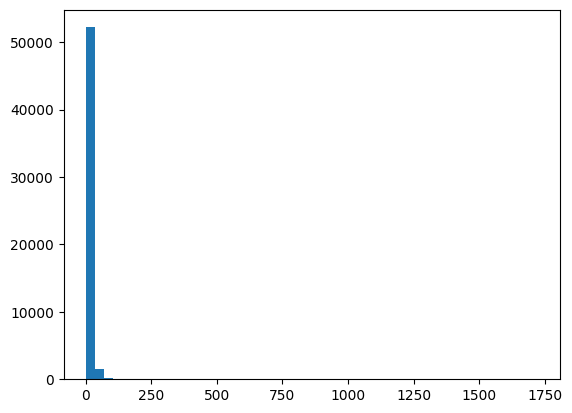

In [149]:
import matplotlib.pyplot as plt
plt.hist(df_length, bins=50)


In [150]:
df_length.describe()

count    54027.000000
mean         9.941178
std         15.541349
min          2.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       1721.000000
Name: 0, dtype: float64

In [151]:
df["length"]=df_length

In [158]:
df.columns

Index([0, 1, 'length'], dtype='object')

In [164]:
df_filtered=df.rename(columns={0:"sentence",1:"label"})

In [165]:
df_filtered

,sentence,label,length
0,nchallah rabi m3ana bravo big boss,1,6
1,aweel cmnyr bravooo sanfouuur,1,4
2,walid inti mkache5 w win nemchi il paga min pa...,0,22
3,bllhh sayebna rahou joumhour lclub maye3taref ...,0,33
4,5amamt ta3mil pron,0,3
...,...,...,...
54022,nchlah mabrouk a3lina yal capo slouma,1,6
54023,toooop klay izzziiiin,1,3
54024,rabi i5lik iltouns wtwansa l9lalla,1,5
54025,inhebou nkharjoo kbayriat ca rabbbbi maak m sl...,1,22


In [166]:
df_filtered=df_filtered.loc[df_filtered["length"]<10]

In [170]:
df_filtered

,sentence,label,length
0,nchallah rabi m3ana bravo big boss,1,6
1,aweel cmnyr bravooo sanfouuur,1,4
4,5amamt ta3mil pron,0,3
8,andhomm rabb karim razzag rahim,1,5
9,bravo mr selim,1,3
...,...,...,...
54021,ya mnaik,0,2
54022,nchlah mabrouk a3lina yal capo slouma,1,6
54023,toooop klay izzziiiin,1,3
54024,rabi i5lik iltouns wtwansa l9lalla,1,5


In [169]:
df_filtered.describe()

,label,length
count,37423.000000,37423.000000
mean,0.630334,4.769260
std,0.482721,2.115085
min,0.000000,2.000000
25%,0.000000,3.000000
50%,1.000000,4.000000
75%,1.000000,6.000000
max,1.000000,9.000000


In [172]:
words_list=[]
for i in df_filtered["sentence"]:
    words=i.split(" ")
    for j in words:
        if not j in words_list:
            words_list.append(j)
    counter.update(1)

56999it [17:45, 685.01it/s]                            

In [173]:
len(words_list)

50143

57053it [18:02, 685.01it/s]

In [174]:
df_words=pd.DataFrame()

In [176]:
df_words["words"]=words_list

In [178]:
import numpy as np

In [183]:
df_words["label"]=np.zeros(len(words_list))

In [184]:
df_words

,words,label
0,nchallah,0.0
1,rabi,0.0
2,m3ana,0.0
3,bravo,0.0
4,big,0.0
...,...,...
50138,iltouns,0.0
50139,wtwansa,0.0
50140,l9lalla,0.0
50141,zinin,0.0


In [187]:
df_words.to_csv("dictionaire.csv", index=False)

In [190]:
df_filtered["word_list"]=df_filtered["sentence"].apply(lambda x:x.split(" "))

/tmp/ipykernel_7994/3722772344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["word_list"]=df_filtered["sentence"].apply(lambda x:x.split(" "))


In [192]:
df_filtered.to_csv("dataset.csv",index=False)

In [224]:
df_filtered["sentence"]
import os
import curses

import sys

def clear_console():
    sys.stdout.write("\033[2J\033[1;1H")
    sys.stdout.flush()
df_filtered['subject_mask']=np.zeros(df_filtered.shape[0])
df_filtered['subject_mask']=df_filtered['subject_mask'].apply(lambda x: [x])

/tmp/ipykernel_7994/1332484021.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['subject_mask']=np.zeros(df_filtered.shape[0])
/tmp/ipykernel_7994/1332484021.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['subject_mask']=df_filtered['subject_mask'].apply(lambda x: [x])


In [225]:
df_filtered

,sentence,label,length,word_list,subject_mask
0,nchallah rabi m3ana bravo big boss,1,6,"[nchallah, rabi, m3ana, bravo, big, boss]",[0.0]
1,aweel cmnyr bravooo sanfouuur,1,4,"[aweel, cmnyr, bravooo, sanfouuur]",[0.0]
4,5amamt ta3mil pron,0,3,"[5amamt, ta3mil, pron]",[0.0]
8,andhomm rabb karim razzag rahim,1,5,"[andhomm, rabb, karim, razzag, rahim]",[0.0]
9,bravo mr selim,1,3,"[bravo, mr, selim]",[0.0]
...,...,...,...,...,...
54021,ya mnaik,0,2,"[ya, mnaik]",[0.0]
54022,nchlah mabrouk a3lina yal capo slouma,1,6,"[nchlah, mabrouk, a3lina, yal, capo, slouma]",[0.0]
54023,toooop klay izzziiiin,1,3,"[toooop, klay, izzziiiin]",[0.0]
54024,rabi i5lik iltouns wtwansa l9lalla,1,5,"[rabi, i5lik, iltouns, wtwansa, l9lalla]",[0.0]


In [235]:
for i,j,lab in zip(df_filtered.head(2)["sentence"],df_filtered.head(2)["word_list"],df_filtered.head(2)["label"]):
    labels=[]
    
    for l in j:
        print(i,"\n")
        print("is '",l,"' a subject")
        label=input()
        if label==1: 
            labels.append(1) 
        else:
            labels.append(0)
        clear_console()
    #check if first element by trying to import, if import fails means first element
    try:
        df_out=pd.read_csv("dataset_out.csv")
    except:
        df_out=pd.DataFrame(columns=['sentence', 'label', 'subject_mask'])
    line={'sentence': i, 'label': lab, 'subject_mask': labels}
    df_out=df_out.append(line,ignore_index=True)
    print(df_out)
    df_out.to_csv("dataset_out.csv",index=False)

nchallah rabi m3ana bravo big boss 

is ' nchallah ' a subject


nchallah rabi m3ana bravo big boss 

is ' rabi ' a subject


nchallah rabi m3ana bravo big boss 

is ' m3ana ' a subject


nchallah rabi m3ana bravo big boss 

is ' bravo ' a subject


nchallah rabi m3ana bravo big boss 

is ' big ' a subject


 1


nchallah rabi m3ana bravo big boss 

is ' boss ' a subject


 1


/tmp/ipykernel_7994/2777814023.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_out=df_out.append(line,ignore_index=True)


                             sentence      label        subject_mask
0  nchallah rabi m3ana bravo big boss       boss  [0, 0, 0, 0, 0, 0]
1       aweel cmnyr bravooo sanfouuur  sanfouuur        [0, 0, 0, 0]
2  nchallah rabi m3ana bravo big boss          1  [0, 0, 0, 0, 0, 0]
aweel cmnyr bravooo sanfouuur 

is ' aweel ' a subject


aweel cmnyr bravooo sanfouuur 

is ' cmnyr ' a subject


aweel cmnyr bravooo sanfouuur 

is ' bravooo ' a subject


aweel cmnyr bravooo sanfouuur 

is ' sanfouuur ' a subject


 1


                             sentence      label        subject_mask
0  nchallah rabi m3ana bravo big boss       boss  [0, 0, 0, 0, 0, 0]
1       aweel cmnyr bravooo sanfouuur  sanfouuur        [0, 0, 0, 0]
2  nchallah rabi m3ana bravo big boss          1  [0, 0, 0, 0, 0, 0]
3       aweel cmnyr bravooo sanfouuur          1        [0, 0, 0, 0]


/tmp/ipykernel_7994/2777814023.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_out=df_out.append(line,ignore_index=True)


In [229]:
df_filtered["subject_mask"].to_list()

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
